In [1]:
import tensorflow as tf
import pathlib
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
data_dir = "frames"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

test_data_dir = "test_frames"
test_data_dir = pathlib.Path(test_data_dir)
test_image_count = len(list(test_data_dir.glob('*/*.jpg')))
print(test_image_count)

BATCH_SIZE = 32
IMG_HEIGHT = 720//2
IMG_WIDTH = 1280//2
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
VALIDATION_STEPS = np.ceil(test_image_count/BATCH_SIZE)

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

24620
4406


Found 24620 images belonging to 8 classes.
Found 4406 images belonging to 1 classes.
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


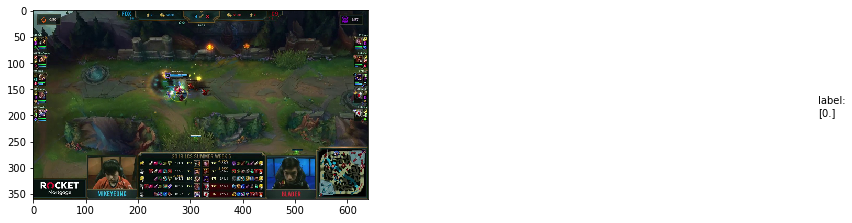

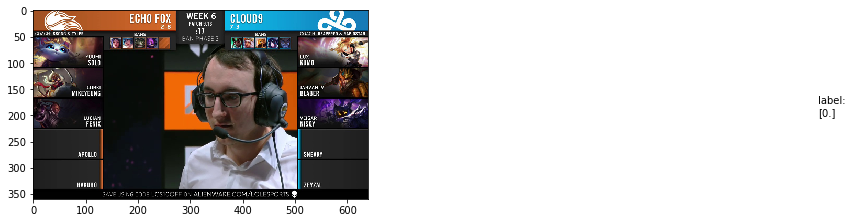

In [14]:
def label_map(datagen):
    for x in datagen:
        
        # Get the filenames that are shuffled
        current_index = ((datagen.batch_index-1) * datagen.batch_size)
        if current_index < 0:
            if datagen.samples % datagen.batch_size > 0:
                current_index = max(0,datagen.samples - datagen.samples % datagen.batch_size)
            else:
                current_index = max(0,datagen.samples - datagen.batch_size)
        index_array = datagen.index_array[current_index:current_index + datagen.batch_size].tolist()
        img_paths = [datagen.filepaths[idx] for idx in index_array]
        y = []
        for f in img_paths:
#             print(f)
            label = np.zeros(1)
            if "-h" in f:
                label[0] = 1
            y.append(label)
        yield x, np.array(y)

train_data_gen = train_image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode=None)
train_data_gen = label_map(train_data_gen)

test_data_gen = train_image_generator.flow_from_directory(directory=str(test_data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode=None)
test_data_gen = label_map(test_data_gen)

data, labels = next(test_data_gen)
print(labels)
for i in range(2):
    plt.figure()
    plt.imshow(data[i])
    plt.text(1500,200,"label:\n" + str(labels[i]))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 358, 638, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 179, 319, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 179, 319, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 177, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 88, 158, 64)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 88, 158, 64)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 86, 156, 64)      

In [8]:
mc = ModelCheckpoint('models/best_non_seq_model_seg.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss=K.binary_crossentropy, 
              optimizer='adam',
              metrics=[])

history = model.fit_generator(train_data_gen, 
                    epochs=20, 
                    validation_data=test_data_gen,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    callbacks=[mc],
                    use_multiprocessing=True,
                    workers=2,
                   )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
 32/770 [>.............................] - ETA: 14:14 - loss: 0.2643

Process Keras_worker_ForkPoolWorker-1:
Process Keras_worker_ForkPoolWorker-2:


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/keras/utils/data_utils.py", line 832, in next_sample
    return six.next(_SHARED_SEQUENCES[uid])
  File "<ipython-input-6-20a1dc911886>", line 2, in label_map
    for x in datagen:
  File "/usr/local/lib/python3.5/dist-packages/keras_preprocessing/image/iterator.py", line 104, in __next__
    return self.next(*args, **

Epoch 1/20
